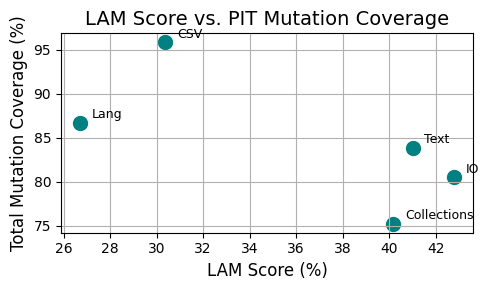

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


pit_scores_path = '/Users/parinaykarande/Desktop/Capstone/Spring_25/Work/PIT_Scores.xlsx'
lam_scores_path = '/Users/parinaykarande/Desktop/Capstone/Spring_25/Work/LAM_Scores.xlsx'


pit_df = pd.read_excel(pit_scores_path)
lam_df = pd.read_excel(lam_scores_path)


merged_df = pd.merge(pit_df, lam_df, on='Project')


plt.figure(figsize=(5, 3))
plt.scatter(merged_df['LAM Score (%)'], merged_df['Total Mutation Coverage (%)'], color='teal', s=100)


for _, row in merged_df.iterrows():
    plt.text(row['LAM Score (%)'] + 0.5, row['Total Mutation Coverage (%)'] + 0.5, row['Project'], fontsize=9)

# Labels and title
plt.xlabel('LAM Score (%)', fontsize=12)
plt.ylabel('Total Mutation Coverage (%)', fontsize=12)
plt.title('LAM Score vs. PIT Mutation Coverage', fontsize=14)
plt.grid(True)
plt.tight_layout()

plt.show()


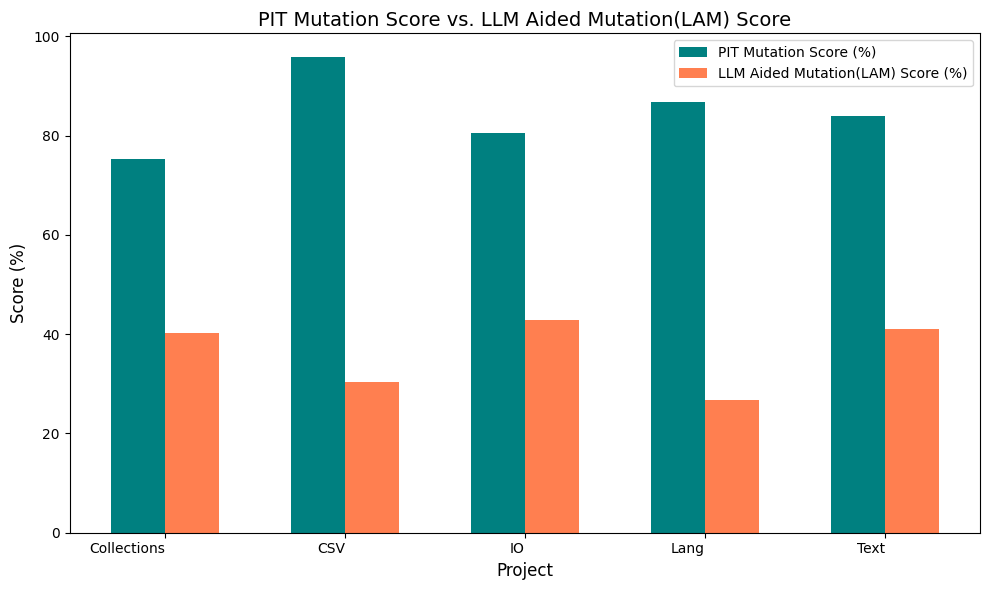

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))


bar_width = 0.30
index = range(len(merged_df))


bar1 = ax.bar(index, merged_df['Total Mutation Coverage (%)'], bar_width, label='PIT Mutation Score (%)', color='teal')

bar2 = ax.bar([i + bar_width for i in index], merged_df['LAM Score (%)'], bar_width, label='LLM Aided Mutation(LAM) Score (%)', color='coral')

ax.set_xlabel('Project', fontsize=12)
ax.set_ylabel('Score (%)', fontsize=12)
ax.set_title('PIT Mutation Score vs. LLM Aided Mutation(LAM) Score', fontsize=14)
ax.set_xticks([i + bar_width / 2 for i in index])  
ax.set_xticklabels(merged_df['Project'], rotation=0, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


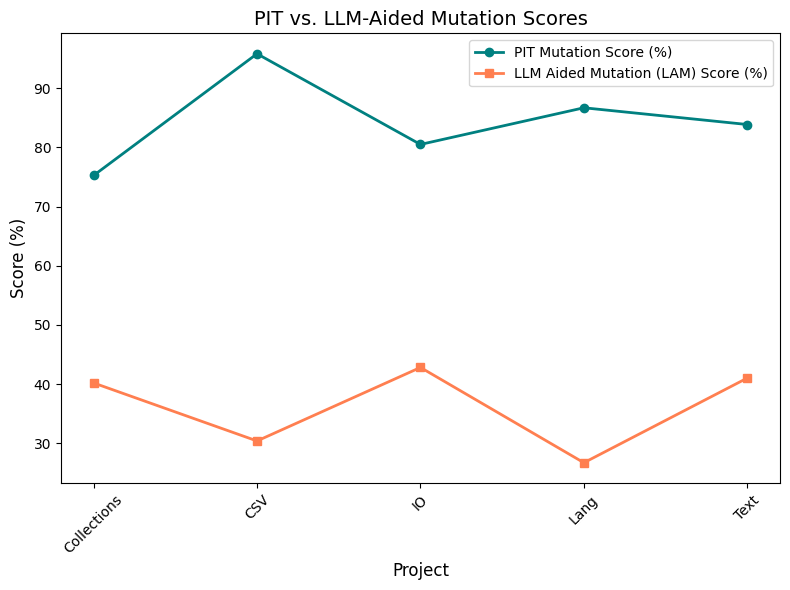

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(merged_df['Project'], merged_df['Total Mutation Coverage (%)'], marker='o', label='PIT Mutation Score (%)', color='teal', linewidth=2)
ax.plot(merged_df['Project'], merged_df['LAM Score (%)'], marker='s', label='LLM Aided Mutation (LAM) Score (%)', color='coral', linewidth=2)

ax.set_xlabel('Project', fontsize=12)
ax.set_ylabel('Score (%)', fontsize=12)
ax.set_title('PIT vs. LLM-Aided Mutation Scores', fontsize=14)
ax.legend()


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

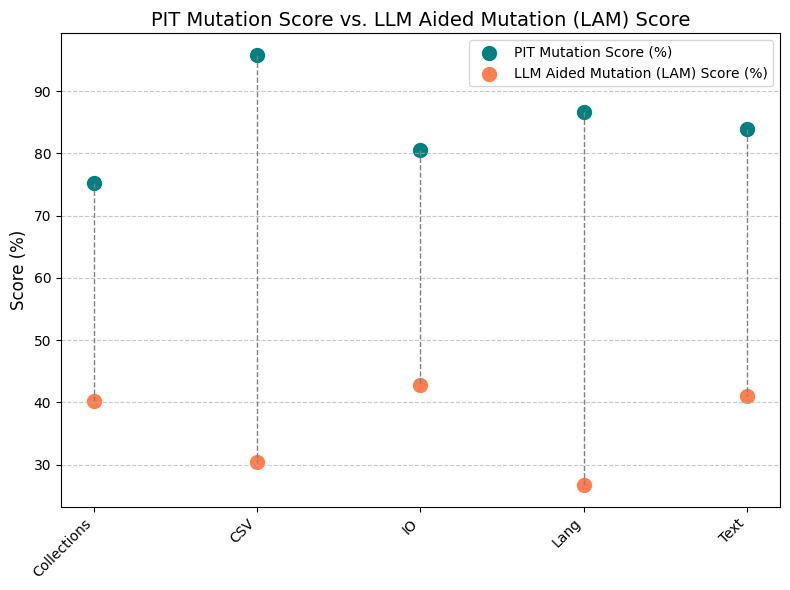

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

x = range(len(merged_df))

# Plot lines
for i in x:
    ax.plot([i, i], [merged_df['Total Mutation Coverage (%)'][i], merged_df['LAM Score (%)'][i]],
            color='gray', linewidth=1, linestyle='--')


ax.scatter(x, merged_df['Total Mutation Coverage (%)'], color='teal', s=100, label='PIT Mutation Score (%)')
ax.scatter(x, merged_df['LAM Score (%)'], color='coral', s=100, label='LLM Aided Mutation (LAM) Score (%)')


ax.set_xticks(x)
ax.set_xticklabels(merged_df['Project'], rotation=45, ha='right')
ax.set_ylabel('Score (%)', fontsize=12)
ax.set_title('PIT Mutation Score vs. LLM Aided Mutation (LAM) Score', fontsize=14)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [16]:
selected_df = merged_df[['Project','Total Mutation Coverage (%)','LAM Score (%)']].rename(columns={'Total Mutation Coverage (%)': 'PIT Score (%)'})

print(selected_df.to_string(index=False))

    Project  PIT Score (%)  LAM Score (%)
Collections          75.26          40.18
        CSV          95.84          30.37
         IO          80.51          42.80
       Lang          86.71          26.69
       Text          83.88          41.01
